**3D von Koch surface (quadratic)**

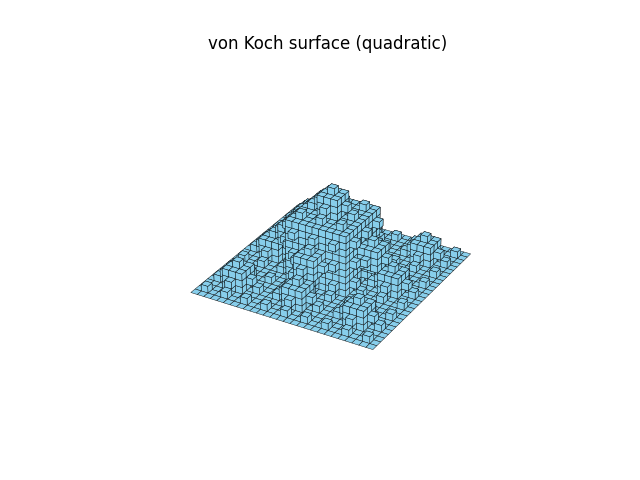

In [1]:
%matplotlib widget
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.pyplot as plt
import numpy as np


iterations = 3
n = 4

def split_into_16points(points):
    edge1 = np.linspace(points[0], points[1], 4)
    edge2 = np.linspace(points[3], points[2], 4)
    return [np.linspace(e1, e2, 4) for e1, e2 in list(zip(edge1, edge2))]


def distance(p1: np.array, p2: np.array):
    return np.linalg.norm(p1 - p2)


def construct_new_grow(bottom, index):
    diff = bottom[index] - bottom[(index + 3) % n]
    grow = []
    for d in diff:
        if d != 0:
            grow.append(d / abs(d))
        else:
            grow.append(0)
    return grow


class Square:
    def __init__(self, points: np.array, grow: np.array):
        self.points = sorted(points, key = lambda x: np.linalg.norm(x))
        self.points[2], self.points[3] = self.points[3], self.points[2]
        self.grow = grow

    def get_koch_transformed(self):
        split = self.split_into_nine()
        bottom = split.pop(4).points
        a = distance(bottom[0], bottom[1])

        roof = Square((np.array(bottom) + np.array(self.grow) * a).tolist(), self.grow)
        split.append(roof)
        roof = roof.points

        sides = []
        for i in range(n):
            sides.append(Square([bottom[i % n],
                                 bottom[(i + 1) % n],
                                 roof[i % n],
                                 roof[(i + 1) % n]],
                                construct_new_grow(bottom, i)))
        split.extend(sides)
        return split

    def split_into_nine(self):
        split = []
        new_points = split_into_16points(self.points)
        for i in range(len(new_points) - 1):
            for j in range(len(new_points[0]) - 1):
                split.append(Square([new_points[i][j],
                                     new_points[i + 1][j],
                                     new_points[i + 1][j + 1],
                                     new_points[i][j + 1]], self.grow))
        return split



start = Square([[0, 0, 30], [100, 0, 30], [100, 100, 30], [0, 100, 30]], [0, 0, 1])
squares = [start]

for iteration in range(iterations):
    fractal = []
    for square in squares:
        fractal.extend(square.get_koch_transformed())
    squares = fractal


ax = plt.axes(projection='3d')


def hide_axes():
    color_tuple = (1.0, 1.0, 1.0, 0.0)
    ax.w_xaxis.set_pane_color(color_tuple)
    ax.w_yaxis.set_pane_color(color_tuple)
    ax.w_zaxis.set_pane_color(color_tuple)
    ax.w_xaxis.line.set_color(color_tuple)
    ax.w_yaxis.line.set_color(color_tuple)
    ax.w_zaxis.line.set_color(color_tuple)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_zticks([])
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.set_zlabel('')


def config_axes():
    ax.set_title('von Koch surface (quadratic)')
    ax.set_box_aspect([1,1,1])
    ax.set_xlim([-1,101])
    ax.set_ylim([-1,101])
    ax.set_zlim([-1,101])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')


config_axes()
hide_axes()
ax.add_collection3d(Poly3DCollection([square.points for square in squares], edgecolors='k', facecolors='skyblue', linewidths=0.3))
plt.show()